In [ ]:
# Visualize the weather of 500+ cities across the world of varying distance from the equator. 

In [1]:
# Dependencies

from citipy import citipy
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress

from config import owm_key

In [2]:
# Build partial query URL for Open Weather

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={owm_key}&units={units}&q="

In [6]:
#  Generate a list of 500 cities

cities = []
i = 0
while len(cities)<500:
    lat = np.random.randint(low=-90,high=90)
    long = np.random.randint(low=-180,high=180)
    city = (citipy.nearest_city(lat, long).city_name)
    if city not in city_list:
        cities.append(city)
    i = i + 1
    if i > 2000:
        break
        
if len(cities) < 500:
    print ("You didn't get 500 cities - increase the break parameter")

len(cities)

500

In [7]:
# collect data from Open Weather 

# set up lists to hold reponse info
valid_cities_n = []
valid_cities_s = []
lat_n = []
lat_s = []
temp_n = []
temp_s = []
humidity_n = []
humidity_s = []
wind_n = []
wind_s = []
clouds_n = []
clouds_s = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        if response['coord']['lat'] >= 0:
            valid_cities_n.append(city)
            lat_n.append(response['coord']['lat'])
            temp_n.append(response['main']['temp'])
            humidity_n.append(response['main']['humidity'])
            wind_n.append(response['wind']['speed'])
            clouds_n.append(response['clouds']['all'])
        else:
            valid_cities_s.append(city)
            lat_s.append(response['coord']['lat'])
            temp_s.append(response['main']['temp'])
            humidity_s.append(response['main']['humidity'])
            wind_s.append(response['wind']['speed'])
            clouds_s.append(response['clouds']['all'])

valid_cities = valid_cities_n + valid_cities_s
lat = lat_n + lat_s
temp = temp_n + temp_s
humidity = humidity_n + humidity_s
wind = wind_n + wind_s
clouds = clouds_n + clouds_s

# build dataframe from results
weather_results_df = pd.DataFrame(
    {"City": valid_cities,
     "Latitude": lat,
     "Temperature": temp,
     "Humidity": humidity,
     "Wind": wind,
     "Clouds": clouds,
     })

weather_results_df.head()

,City,Latitude,Temperature,Humidity,Wind,Clouds
0,iracoubo,5.48,80.56,80,10.02,6
1,hailar,49.20,31.80,80,13.15,0
2,katrineholm,59.00,43.81,93,6.93,13
3,togur,58.36,32.95,97,11.18,100
4,sur,22.57,74.57,56,1.90,0


In [8]:
# Create scatter plots to show the following relationships from data gathered from Open Weather 
# 1. Temperature (F) vs. Latitude
# 2. Humidity (%) vs. Latitude
# 3. Cloudiness (%) vs. Latitude
# 4. Wind Speed (mph) vs. Latitude

In [9]:
def print_scatterchart(x_axis, y_axis, title, x_label, y_label):

    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

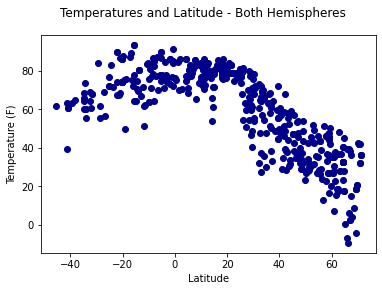

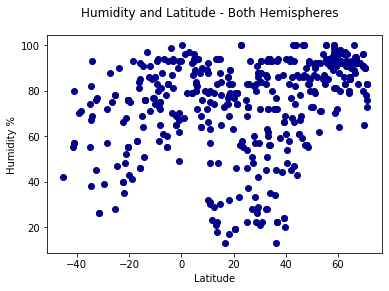

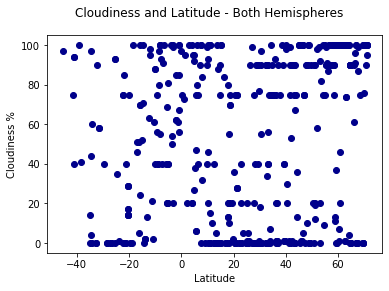

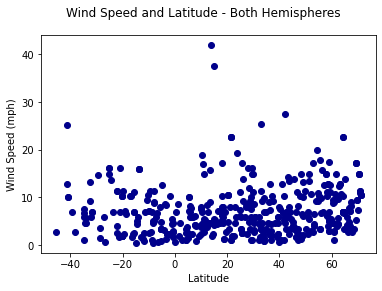

In [10]:
# print scatter charts

# Temperature vs. Latitude
print_scatterchart(lat, temp, "Temperatures and Latitude - Both Hemispheres", "Latitude", "Temperature (F)")
print("")

# Humidity vs. Latitude
print_scatterchart(lat, humidity, "Humidity and Latitude - Both Hemispheres", "Latitude", "Humidity %")
print("")

# Cloudiness vs. Latitude
print_scatterchart(lat, clouds, "Cloudiness and Latitude - Both Hemispheres", "Latitude", "Cloudiness %")
print("")

# Wind speed vs. Latitude
print_scatterchart(lat, wind, "Wind Speed and Latitude - Both Hemispheres", "Latitude", "Wind Speed (mph)")



In [11]:
# Run linear regression on each relationship, only this time separating them into
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and
# Southern Hemisphere (less than 0 degrees latitude)

In [62]:
def print_scatter_and(x_axis, y_axis, title, x_label, y_label):
# print scatter charter and regression analsysi

    # make x_axis amenable to calculation of regression values
    x_axis = np.asarray(x_axis)
    
    # run linregress to get components for correlaton coefficient and regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,  y_axis)
    regress_values = x_axis * slope + intercept

    # calc correlation coefficient and format regression model equation
    correlation_coefficient = round(rvalue**2, 2)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # figure out where to place the regression model equation
    test_val = (slope*max(x_axis) + intercept) - (slope*min(x_axis) + intercept)
    x_pos = min(x_axis)
    if test_val > 0:
        if max(y_axis) > 25:
            y_pos = max(y_axis) - 5
        else:
            y_pos = max(y_axis) - 1
    else:
        if max(y_axis) > 25:
            y_pos = min(y_axis) + 5
        else:
            y_pos = min(y_axis) + 1

    # format and print plot
    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="#79abcd")
    plt.plot(x_axis,regress_values,"#f70d30")
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="#f70d30",fontweight="bold")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f'Correlation coefficient = {correlation_coefficient}')
    print('')


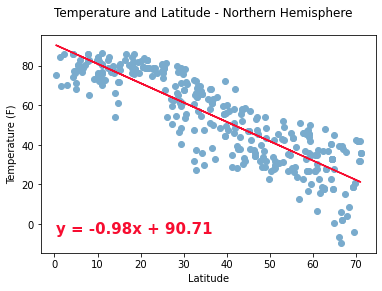

Correlation coefficient = 0.75




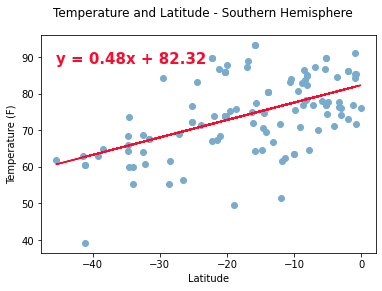

Correlation coefficient = 0.28




In [63]:
# Calculate the correlation coefficient and linear regression model 
# Temperature (F) vs. Latitude by hemisphere

measure = "Temperature"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, temp_n, title, "Latitude", f"{measure} (F)")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, temp_s, title, "Latitude", f"{measure} (F)")
print("")


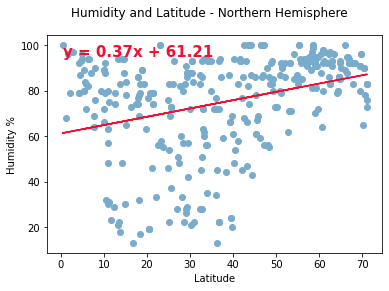

Correlation coefficient = 0.11




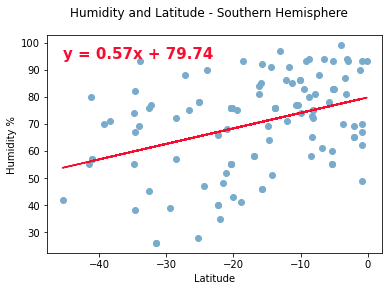

Correlation coefficient = 0.14




In [64]:
# Calculate the correlation coefficient and linear regression model 
# Humidity (%) vs. Latitude

measure = "Humidity"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, humidity_n, title, "Latitude", f"{measure} %")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, humidity_s, title, "Latitude", f"{measure} %")
print("")


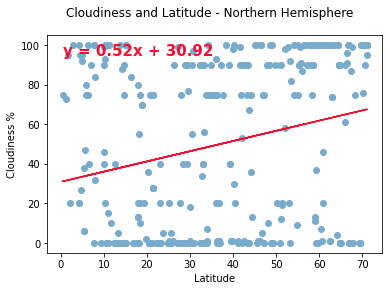

Correlation coefficient = 0.06




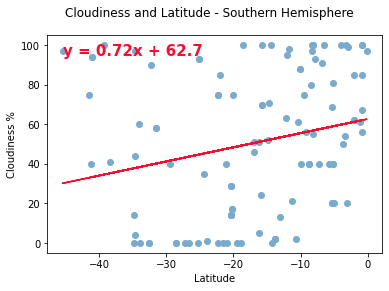

Correlation coefficient = 0.05




In [65]:
# Calculate the correlation coefficient and linear regression model 
# Cloudiness (%) vs. Latitude

measure = "Cloudiness"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, clouds_n, title, "Latitude", f"{measure} %")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, clouds_s, title, "Latitude", f"{measure} %")
print("")


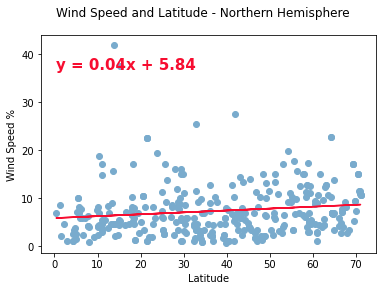

Correlation coefficient = 0.02




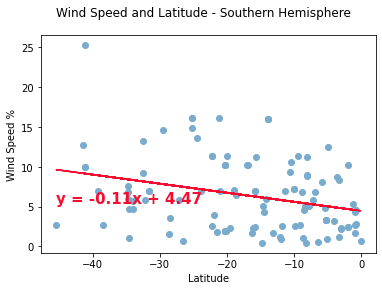

Correlation coefficient = 0.08




In [66]:
# Calculate the correlation coefficient and linear regression model 
# Wind Speed (mph) vs. Latitude

measure = "Wind Speed"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, wind_n, title, "Latitude", f"{measure} %")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, wind_s, title, "Latitude", f"{measure} %")
print("")
